In [1]:
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import cv2
from matplotlib import pyplot as plt
from qiskit.circuit.library import *
c4xgate = C4XGate()
c3xgate = C3XGate()
ccxgate = CCXGate()

In [ ]:
#本实验为图像置乱实验，大体内容都是先制备后对颜色信息比特进行相应的操作
#具体注释看前几个

In [2]:
picture_path = 'lenna.jpeg'

img = cv2.imread(picture_path, 1)

In [3]:
channel_B = cv2.resize(img[:, :, 0], (32,32))
channel_G = cv2.resize(img[:, :, 1], (32,32))
channel_R = cv2.resize(img[:, :, 2], (32,32))

In [4]:
channel_R.shape

(32, 32)

In [5]:
channel_R

array([[226, 223, 231, ..., 195, 198, 175],
       [229, 223, 228, ..., 198, 156,  92],
       [225, 231, 228, ..., 159,  97,  99],
       ...,
       [ 96, 185, 232, ..., 156, 146, 117],
       [159, 195, 229, ..., 126, 161, 114],
       [ 99, 224, 230, ..., 153, 135, 106]], dtype=uint8)

In [6]:
x = 32 
y = 32
index = x*y

channel_R_color_list = []
channel_R_index_list = []
channel_G_color_list = []
channel_G_index_list = []
channel_B_color_list = []
channel_B_index_list = []

for j in range(index):
    channel_R_index_list.append('00' + bin(j).replace('0b','').zfill(10))
    channel_G_index_list.append('01' + bin(j).replace('0b','').zfill(10))
    channel_B_index_list.append('10' + bin(j).replace('0b','').zfill(10))


for j in range(x):
    for k in range(y):
        channel_R_color_list.append(bin(channel_R[j][k]).replace('0b','').zfill(8))
        channel_G_color_list.append(bin(channel_G[j][k]).replace('0b','').zfill(8))
        channel_B_color_list.append(bin(channel_B[j][k]).replace('0b','').zfill(8))

In [7]:
gateValueMap_R = {}
gateValueMap_G = {}
gateValueMap_B = {}
for pos in range(index):
    for cindex in range(8):
        if channel_R_color_list[pos][cindex] == '1':
            key = channel_R_index_list[pos] + str(cindex)
            gateValueMap_R[key] = 1
        if channel_G_color_list[pos][cindex] == '1':
            key = channel_G_index_list[pos] + str(cindex)
            gateValueMap_G[key] = 1
        if channel_B_color_list[pos][cindex] == '1':
            key = channel_B_index_list[pos] + str(cindex)
            gateValueMap_B[key] = 1

In [8]:
keySet_R = gateValueMap_R.keys()
keySet_G = gateValueMap_G.keys()
keySet_B = gateValueMap_B.keys()

In [9]:
keySetList_R = []
keySetList_G = []
keySetList_B = []

for i in keySet_R:
    keySetList_R.append(i)
    
for i in keySet_G:
    keySetList_G.append(i)

for i in keySet_B:
    keySetList_B.append(i)    

In [10]:
lenKeySetList_R = len(keySetList_R)
pre_R = lenKeySetList_R

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_R):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_R):
            flag = 0
            pos = 0
            if keySetList_R[i][12] == keySetList_R[j][12]:
                for k in range(12):
                    if keySetList_R[i][k] != keySetList_R[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_R[i])
                    strList[pos] = '*'
                    keySetList_R[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_R[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_R.remove(l)
    lenKeySetList_R = len(keySetList_R)
    if pre_R == lenKeySetList_R:
        break
    pre_R = lenKeySetList_R

1708
370
83
17
1
0


In [11]:
lenKeySetList_G = len(keySetList_G)
pre_G = lenKeySetList_G

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_G):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_G):
            flag = 0
            pos = 0
            if keySetList_G[i][12] == keySetList_G[j][12]:
                for k in range(12):
                    if keySetList_G[i][k] != keySetList_G[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_G[i])
                    strList[pos] = '*'
                    keySetList_G[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_G[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_G.remove(l)
    lenKeySetList_G = len(keySetList_G)
    if pre_G == lenKeySetList_G:
        break
    pre_G = lenKeySetList_G

1290
184
10
0


In [12]:
lenKeySetList_B = len(keySetList_B)
pre_B = lenKeySetList_B

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_B):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_B):
            flag = 0
            pos = 0
            if keySetList_B[i][12] == keySetList_B[j][12]:
                for k in range(12):
                    if keySetList_B[i][k] != keySetList_B[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_B[i])
                    strList[pos] = '*'
                    keySetList_B[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_B[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_B.remove(l)
    lenKeySetList_B = len(keySetList_B)
    if pre_B == lenKeySetList_B:
        break
    pre_B = lenKeySetList_B

1408
251
35
5
0


In [13]:
keySetList = keySetList_R + keySetList_G + keySetList_B
for line in keySetList:
    if line[0:2] == '01':
        print(line)

01000000000*0
010000000**05
0100000000*07
0100000000100
01000000001*4
01000000001*6
0100000000111
0100000000112
0100000000113
0100000000117
0100000001002
0100000001003
0100000001**4
0100000001006
0100000001011
01000000011*1
01000000011*7
0100000001113
0100000001115
010000001***1
010000001***2
0100000010*05
0100000010*16
01000000101*7
01000000110*5
0100000011**7
01000000111*6
0100000100**1
01000001000*2
0100000100102
0100000100113
0100000100115
0100000100117
0100000101001
0100000101002
0100000101004
0100000101010
0100000101016
0100000101017
01000001011*0
01000001011*7
01000001100*0
0100000110006
0100000110012
0100000110013
0100000110*14
010000011*015
0100000110*17
0100000110100
01000001101*3
0100000110111
0100000110116
0100000111**1
01000001110*3
01000001110*4
0100000111006
0100000111102
0100000111114
0100000111115
0100000111116
01000010000*0
0100001000*05
01000010000*7
0100001000016
0100001000100
010000100*1*4
0100001000111
0100001000112
010000100*113
0100001000117
0100001001**1
010000

0101011111115
01011000000*1
0101100000004
010110000*007
0101100000015
01011000001*0
0101100000103
0101100000105
0101100000114
0101100001**2
0101100001**3
0101100001**6
0101100001014
0101100001015
0101100001017
0101100001104
01011000011*5
01011000011*7
0101100010000
01011000100*3
01011000100*4
0101100010011
0101100010015
0101100010016
0101100010017
01011000101*1
0101100010103
0101100010104
0101100010105
01011000101*6
01011000101*7
0101100010112
01011000110*2
0101100011*03
0101100011*04
0101100011015
0101100011017
01011000111*5
0101100011107
0101100011111
0101100011114
0101100100*04
01011001000*5
0101100100010
0101100100012
0101100100013
0101100100*16
01011001001*0
01011001001*2
01011001001*7
0101100101000
0101100101*02
01011001010*3
0101100101005
0101100101**7
0101100101011
0101100101016
0101100101101
0101100101103
0101100101104
01011001011*6
0101100101110
0101100101112
0101100101115
0101100110**3
0101100110**5
0101100110*07
0101100110*14
010110011*1*6
0101100110111
0101100110112
010110

0111001011104
01110010111*7
0111001011111
01110011*00*1
01110011000*2
0111001100005
0111001100007
0111001100014
01110011001*0
01110011001*4
01110011001*6
0111001100112
0111001100115
0111001100117
01110011010*0
01110011010*2
0111001101003
0111001101004
01110011010*5
0111001101**6
01110011010*7
0111001101102
0111001101107
0111001101110
0111001101114
01110011100*2
01110011100*3
011100111**04
01110011100*5
0111001110*06
0111001110*07
01110011101*1
011100111*103
0111001110105
0111001110112
0111001110117
01110011110*0
0111001111001
01110011110*5
01110011110*6
0111001111012
0111001111102
0111001111105
01110011111*7
0111001111111
0111001111116
01110100000*1
0111010000**3
0111010000*05
0111010000014
0111010000017
0111010*001*0
01110100001*7
0111010000115
0111010000116
01110100010*3
0111010001**6
0111010001015
0111010001017
0111010001101
0111010001104
0111010001113
01110100100*1
0111010010*06
0111010010014
0111010010102
01110100101*3
011101001*105
0111010010107
0111010010116
01110100110*3
011101

In [14]:
import queue

In [15]:
QuantumGateDecList = []
auxiliaryQubits = 12
colorStartQubit = 16
for element in keySetList:
    QuantumGateDecQue = queue.Queue()
    for ele in range(len(element) - 1):
        if element[ele] == '*':
            continue
        QuantumGateDecQue.put({ele : element[ele]})
    QuantumGateDecLevelList = []
    count = 0;
    tempRecoverGate = []
    while QuantumGateDecQue.qsize() > 4 :
        childGateList = []
        for num in range(4):
            childGateList.append(QuantumGateDecQue.get())
        childGateList.append(auxiliaryQubits + count)
        QuantumGateDecLevelList.append(childGateList)
        tempRecoverGate.append(childGateList)
        QuantumGateDecQue.put({auxiliaryQubits + count: -1})
#         print(QuantumGateDecLevelList)
#         break
        count += 1
    test = []
    while QuantumGateDecQue.qsize() > 0:
#         childGateList.append(QuantumGateDecQue.get())
        test.append(QuantumGateDecQue.get())
#     childGateList.append(colorStartQubit + int(element[12]))
    test.append(colorStartQubit + int(element[12]))
#     QuantumGateDecLevelList.append(childGateList)
    QuantumGateDecLevelList.append(test)
    for i in range(len(tempRecoverGate)):
        QuantumGateDecLevelList.append(tempRecoverGate[len(tempRecoverGate) - 1 - i])
    QuantumGateDecList.append(QuantumGateDecLevelList)
    

In [16]:
QuantumGateDecList

[[[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {12: -1}, 16],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {12: -1}, {13: -1}, 17],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {11: '0'}, {12: -1}, 14],
  [{13: -1}, {14: -1}, 18],
  [{8: '0'}, {9: '0'}, {11: '0'}, {12: -1}, 14],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {12: -1}, {13: -1}, 22],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4:

In [17]:
from qiskit import *
qc = QuantumCircuit(24, 20)
for i in range(12):
    qc.h(i)

In [18]:
def applyGate(qc, decomPose, controlList):
    if len(decomPose) == 5:
            qc.append(c4xgate, controlList)
    elif len(decomPose) == 4:
        qc.append(c3xgate, controlList)
    elif len(decomPose) == 3:
        qc.append(ccxgate, controlList)

In [19]:
for gate in QuantumGateDecList:
    gateLen = len(gate)
    for decomPose in gate:
        controlList = []
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc.x(int(key))
                controlList.append(int(key))
        controlList.append(decomPose[len(decomPose)-1])
        applyGate(qc, decomPose, controlList)
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc.x(int(key))
        qc.barrier()

In [20]:
#shuffle
for i in range(4):
    qc.swap(16+i, 23-i)
for i in range(8):
    qc.x(16+i)
for i in range(7):
    qc.cx(16+i, 17+i)

In [21]:
for i in range(12):
    qc.measure(i, 19 - i)

for j in range(8):
    qc.measure(16 + j, 7 - j)

In [22]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=40000)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)

{'00010000000000100001': 9, '00010000000111001000': 19, '00000000000100000010': 14, '00010000001010010101': 4, '00010000001110111011': 6, '00010000010000010001': 8, '00010000010110100101': 12, '00010000011000001000': 9, '00010000011110100101': 10, '00010000100010110001': 14, '00010000100101110010': 6, '00010000101000111000': 9, '00010000101110100101': 9, '00010000110001110010': 15, '00010000110110100000': 6, '00000001000011101001': 6, '00010000111010100000': 8, '00010000111101011000': 13, '00010001000000011011': 15, '00010001000110101001': 8, '00010001001000111000': 12, '00000001000100111000': 10, '00010001001110011011': 10, '00010001010010101001': 3, '00010001010101010010': 6, '00010001011000011000': 13, '00010001011100101001': 4, '00010001100000110000': 8, '00010001100101111011': 10, '00010001101010111101': 11, '00010001101100100111': 8, '00010001110001101111': 13, '00010001110101101001': 8, '00010001111000101001': 11, '00010001111101011000': 11, '00010010000010110001': 10, '00010010

In [23]:
bitPlane = []
for i in counts:
    bitPlane.append(i)

In [24]:
channel0_0 = {}
channel0_1 = {}
channel1_0 = {}
for element in bitPlane:
    if element[0:2] == '00':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_0[key] = val
    elif element[0:2] == '01':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_1[key] = val
    elif element[0:2] == '10':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel1_0[key] = val

In [25]:
channel0_0

{256: 33,
 257: 200,
 1: 2,
 258: 149,
 259: 187,
 260: 17,
 261: 165,
 262: 8,
 263: 165,
 264: 177,
 265: 114,
 266: 56,
 267: 165,
 268: 114,
 269: 160,
 16: 233,
 270: 160,
 271: 88,
 272: 27,
 273: 169,
 274: 56,
 17: 56,
 275: 155,
 276: 169,
 277: 82,
 278: 24,
 279: 41,
 280: 48,
 281: 123,
 282: 189,
 283: 39,
 284: 111,
 285: 105,
 286: 41,
 287: 88,
 288: 177,
 289: 225,
 290: 32,
 18: 56,
 291: 240,
 292: 17,
 293: 177,
 294: 225,
 295: 160,
 296: 178,
 297: 171,
 298: 72,
 299: 105,
 300: 66,
 301: 144,
 302: 160,
 303: 216,
 304: 169,
 305: 16,
 306: 245,
 307: 120,
 308: 56,
 309: 53,
 310: 112,
 311: 181,
 312: 82,
 313: 82,
 314: 86,
 315: 228,
 19: 193,
 316: 98,
 317: 66,
 318: 117,
 319: 226,
 320: 172,
 321: 8,
 322: 21,
 323: 59,
 324: 75,
 325: 33,
 326: 97,
 327: 128,
 328: 130,
 329: 97,
 330: 34,
 331: 66,
 332: 80,
 333: 226,
 20: 233,
 334: 178,
 335: 53,
 336: 16,
 21: 2,
 337: 16,
 338: 34,
 339: 149,
 340: 112,
 341: 130,
 342: 160,
 343: 160,
 344: 129,


In [26]:
channel_R = []
channel_G = []
channel_B = []
for i in range(1024):
    channel_R.append(channel0_0[i])
    channel_G.append(channel0_1[i])
    channel_B.append(channel1_0[i])    

In [27]:
channel_R = np.array(channel_R).reshape(32, 32, 1)
channel_G = np.array(channel_G).reshape(32, 32, 1)
channel_B = np.array(channel_B).reshape(32, 32, 1)

In [28]:
Image = np.dstack((channel_R, channel_G))
Image = np.dstack((Image, channel_B))

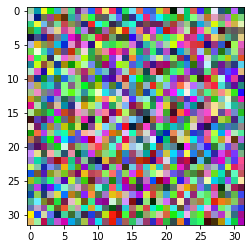

In [29]:
plt.imshow(Image)

In [32]:
Image 

array([[[164, 209, 160],
        [173, 153,   2],
        [ 31, 249, 240],
        ...,
        [ 39, 125,  24],
        [253, 100, 184],
        [ 61,  77,   5]],

       [[223, 209, 210],
        [132,  25,   2],
        [ 79, 121, 112],
        ...,
        [228,  95, 184],
        [ 29, 205, 124],
        [126, 215, 125]],

       [[132, 209,  48],
        [ 54, 249, 240],
        [234, 185, 112],
        ...,
        [167, 126, 252],
        [ 71, 180, 207],
        [183, 244, 228]],

       ...,

       [[183, 116, 100],
        [203, 168, 193],
        [164,  76, 149],
        ...,
        [189, 231, 124],
        [214, 103,  89],
        [231,  58,  42]],

       [[  4, 239, 252],
        [252,  69,  24],
        [164, 220, 210],
        ...,
        [150, 222, 182],
        [132, 111,  49],
        [141,  14, 164]],

       [[ 93, 180, 228],
        [165, 242, 155],
        [ 79,  12, 187],
        ...,
        [253, 221,  60],
        [ 61, 205,  12],
        [183,   3, 173]]